<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Redes_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

In [85]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


50.000 imágenes de entrenamiento y 10.000 imágenes de testeo, las cuales cada imagen presenta 32 pixeles de ancho, 32 pixeles de alto y 3 colores de la paleta RGB.

In [87]:
#Acá apreciaremos una matriz asociada a los 3 colores del primer pixel de la primera imagen:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [88]:
#Acá apreciaremos la etiqueta a la que está asociada la primera imagen:
y_train[0][0]

6

In [89]:
# Definimos los nombres de las clases en base a CIFAR-10
clases = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [90]:
#Revisemos a qué clase pertenecen las imágenes de la primera fila, de la segunda y de la fila 101:
print(clases[y_train[0][0]])
print(clases[y_train[1][0]])
print(clases[y_train[100][0]])

rana
camión
barco


In [91]:
# Convertiremos las etiquetas a one-hot encoding (array)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [92]:
print(y_train[0])
print(y_train[1])
print(y_train[100])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [93]:
#Vemos ahora que las variables y son arreglos binarios:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [95]:
#Analicemos las imágenes:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
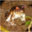

In [99]:
X_train[0]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
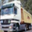

In [100]:
X_train[1]

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]], dtype=uint8)
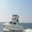

In [101]:
X_train[100]

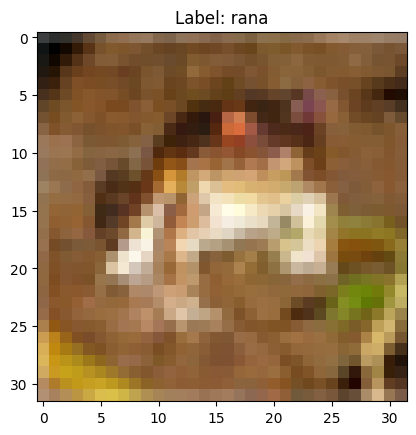

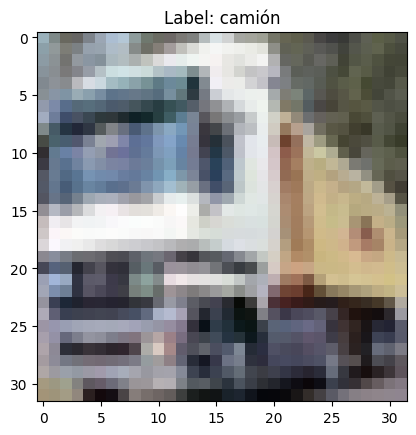

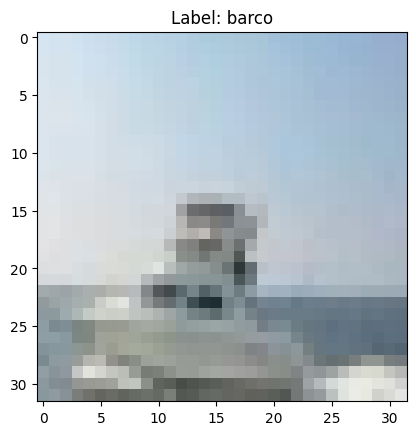

In [158]:
for i in [0,1,100]:
  plt.imshow(X_train[i])
  index = np.argmax(y_train[i])
  plt.title(f'Label: {clases[index]}')
  plt.show()

In [160]:
# Normalizamos los datos a un rango de 0 a 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [161]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [166]:
#Definimos el modelo secuencial
model = Sequential()

# Añadir capas convolucionales, de pooling, flatten y densas
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Se aprecia que la red neuronal viene dada por la forma:

nn = [32, 64, 128, 128, 10]

Vale decir, la red recibirá 32 variables de entrada, pasará por las capas ocultas, y luego entregará 10 potenciales clasificaciones.

In [167]:
#Compilamos el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
#Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 81s 100ms/step - loss: 1.7005 - accuracy: 0.3696 - val_loss: 1.3506 - val_accuracy: 0.5154
Epoch 2/20
782/782 [==============================] - 74s 94ms/step - loss: 1.3113 - accuracy: 0.5306 - val_loss: 1.1990 - val_accuracy: 0.5738
Epoch 3/20
782/782 [==============================] - 75s 96ms/step - loss: 1.1534 - accuracy: 0.5967 - val_loss: 1.0442 - val_accuracy: 0.6237
Epoch 4/20
782/782 [==============================] - 72s 92ms/step - loss: 1.0427 - accuracy: 0.6383 - val_loss: 1.0009 - val_accuracy: 0.6452
Epoch 5/20
782/782 [==============================] - 73s 94ms/step - loss: 0.9610 - accuracy: 0.6659 - val_loss: 0.8864 - val_accuracy: 0.6892
Epoch 6/20
782/782 [==============================] - 72s 93ms/step - loss: 0.8946 - accuracy: 0.6891 - val_loss: 0.8959 - val_accuracy: 0.6845
Epoch 7/20
782/782 [==============================] - 74s 94ms/step - loss: 0.8419 - accuracy: 0.7073 - val_loss: 0.9227 - val_accuracy

Notar que después de cierto epoch, el val_loss comienza a aumentar, por lo que el modelo se está sobreajustando, y solo está disminuyendo la pérdida del entrenamiento.

In [178]:
# Model summary y ploteo del grafo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [169]:
#Revisamos cuál es el Accuracy del modelo:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 4s 14ms/step - loss: 0.8500 - accuracy: 0.7337
Test accuracy: 0.7336999773979187


In [170]:
#Generamos la predicción de las etiquetas:
y_predict = model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [173]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [174]:
y_predict[0]

array([2.5389788e-03, 1.3387014e-04, 2.3907428e-03, 5.1025236e-01,
       8.6434622e-05, 4.7691238e-01, 2.1154121e-03, 5.8007526e-04,
       4.8664431e-03, 1.2326063e-04], dtype=float32)

In [175]:
y_pred_binary = (y_predict > 0.5).astype(int)

In [177]:
y_pred_binary[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])